# A heater - slightly randomized

In [1]:
# Load Packages
import scipy
import matplotlib.pyplot
import numpy
import math
import malbrid
import random
random.seed(1234)

In [2]:
def get_dynamics_and_zero_crossing_functions_dynamics_and_controller(state_name):
    AOn = numpy.array([[-0.01,0,1],[0,0,0],[0,0,0]]) 
    AOff = numpy.array([[-0.01,0,0.2],[0,0,0],[0,0,0]]) 
    
    temp = simulator.get_var("temp")
    r = simulator.get_var("r")
    # CS also used

    def nobumpOn(x):
        return "On",x,False
    def nobumpOff(x):
        return "Off",x,False
    
    if state_name=="On":
        zero_crossing_end = temp>=(80-r)
        return AOn, [(zero_crossing_end, "TurnOn", nobumpOff)]
    if state_name=="Off":
        zero_crossing_end = temp<=(60-r)
        return AOff, [(zero_crossing_end, "TurnOff", nobumpOn)]
    else:
        raise Exception("Internal Test error:"+str(state_name))


def get_dynamics_and_zero_crossing_functions_randomizer(state_name):
    # Dynamics matrices
    ADyn = numpy.array([[0]])
    
    r = simulator.get_var("r")
    # CS also defined

    def bumpResetRandom(x):
        return "OnlyOne",numpy.array([random.random()*5.0]),False
    
    if state_name=="OnlyOne":
        zero_crossing_end = simulator.get_true_condition()
        return ADyn, [(zero_crossing_end, "TurnOn", bumpResetRandom),(zero_crossing_end, "TurnOff", bumpResetRandom)]
    else:
        raise Exception("Internal Test error:"+str(state_name))

'''A test case for Randomized Dynamics -- Product state case'''
simulator = malbrid.LinearSystemSimulator(["temp", "r", "const"])

product_dynamics = malbrid.compute_product_dynamics(
    [("temp",0,[0]),("r",1,[0,1]),("const",0,[0])],
    get_dynamics_and_zero_crossing_functions_dynamics_and_controller,
    get_dynamics_and_zero_crossing_functions_randomizer,["TurnOn","TurnOff"])

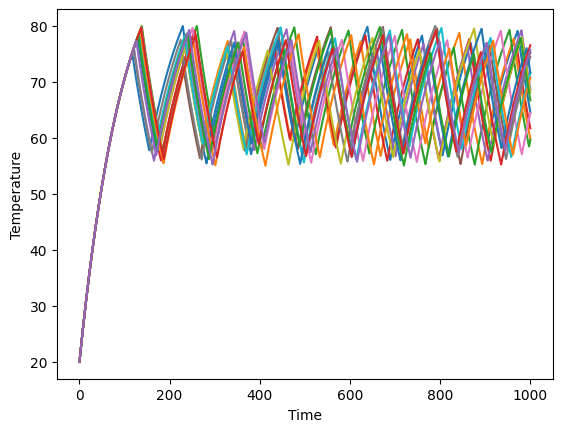

In [3]:
# Take a couple of examples and compute min/max durations in "TurnOff"
durationsTurnedOff = []

for i in range(0,15):
    simulator.simulate(product_dynamics, ("On","OnlyOne"),numpy.array([20.0,random.random()*5.0,1]),
                           max_time=1000)
    matplotlib.pyplot.plot(numpy.array(simulator.time_points)[:],numpy.array(simulator.continuous_states)[:,0])
    
    # How long does 
    start = None
    for i in range(0,len(simulator.discrete_states)):
        if simulator.discrete_states[i][0]=="Off":
            if start is None:
                start = simulator.time_points[i]
        else:
            if not start is None:
                durationsTurnedOff.append(simulator.time_points[i]-start)
            start = None
            
# Finalize Plot
matplotlib.pyplot.xlabel('Time')
matplotlib.pyplot.ylabel('Temperature')
matplotlib.pyplot.show()

In [4]:
# Print information about the "Off" durations
print("Min Length 'Off' period: ",min(durationsTurnedOff))
print("Max Length 'Off' period: ",max(durationsTurnedOff))

Min Length 'Off' period:  32.97424447579195
Max Length 'Off' period:  53.45477347711346
